In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding,GlobalAveragePooling1D
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
vocab = 10000
max_len = 200

(x_train,y_train),(x_test,y_test)= imdb.load_data(num_words=vocab)

x_train = pad_sequences(x_train,maxlen=max_len)
x_test = pad_sequences(x_test,maxlen=max_len)

In [16]:
model = Sequential([
    Embedding(input_dim=vocab, output_dim=32, input_length=max_len),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [17]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 32)           320000    
                                                                 
 global_average_pooling1d_2  (None, 32)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_8 (Dense)             (None, 64)                2112      
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                      

In [23]:
history = model.fit(x_train, y_train, epochs=10, batch_size=512, validation_split=0.2)

Epoch 1/10
40/40 [==============================] - 0s 7ms/step - loss: 0.0740 - accuracy: 0.9804 - val_loss: 0.4272 - val_accuracy: 0.8712
Epoch 2/10
40/40 [==============================] - 0s 6ms/step - loss: 0.0614 - accuracy: 0.9863 - val_loss: 0.4334 - val_accuracy: 0.8702
Epoch 3/10
40/40 [==============================] - 0s 6ms/step - loss: 0.0540 - accuracy: 0.9886 - val_loss: 0.4736 - val_accuracy: 0.8676
Epoch 4/10
40/40 [==============================] - 0s 6ms/step - loss: 0.0475 - accuracy: 0.9901 - val_loss: 0.4857 - val_accuracy: 0.8686
Epoch 5/10
40/40 [==============================] - 0s 6ms/step - loss: 0.0413 - accuracy: 0.9921 - val_loss: 0.5395 - val_accuracy: 0.8672
Epoch 6/10
40/40 [==============================] - 0s 6ms/step - loss: 0.0345 - accuracy: 0.9944 - val_loss: 0.5837 - val_accuracy: 0.8654
Epoch 7/10
40/40 [==============================] - 0s 6ms/step - loss: 0.0328 - accuracy: 0.9949 - val_loss: 0.5959 - val_accuracy: 0.8674
Epoch 8/10
40/40 [==

In [24]:
loss, accuracy= model.evaluate(x_test,y_test)
accuracy

782/782 [==============================] - 0s 440us/step - loss: 0.7498 - accuracy: 0.8433


0.843280017375946

In [25]:
y_pred_prob = model.predict(x_test).flatten()
y_pred = (y_pred_prob >=0.5).astype(int)

782/782 [==============================] - 0s 391us/step


In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85     12500
           1       0.85      0.83      0.84     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000



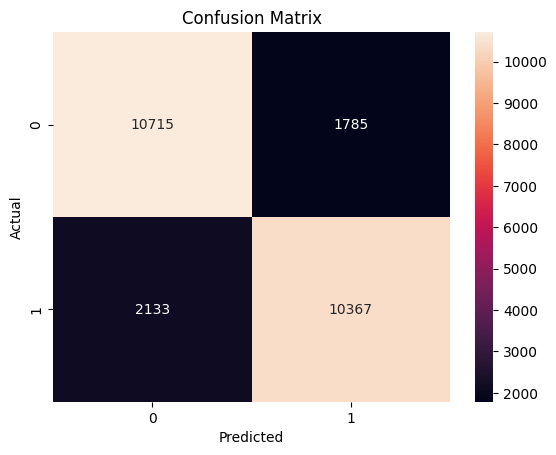

In [39]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()